# 4.1 Logistic Regression

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com

Consider two populations $\Omega_1$, $\Omega_2$ with their random vectors of features associated $\mathbf{x_1},\mathbf{x_2} \in \mathbb{R}^p$, a discriminant is a function $D:\mathbb{R}^p \rightarrow \mathbb{R}$ such that if $D(\mathbf{x}) \geq t$ for some threshold $t \in \mathbb{R}$ then asign $\mathbf{x}$ to $\Omega_1$ otherwise $\mathbf{x}$ to $\Omega_2$. D its a linear discriminant if D has the form:

$$D(\mathbf{x})=\beta_0+\beta_1 x_1 + \dots \beta_p x_p = \beta_0+\mathbf{x' \beta}$$

### Logistic Model
___

Consider the following random vector $(Y,X_1,\dots,Y_p) \in {0,1} \times \mathbb{R}^p$, where $Y$ is and indicator variable and this take the value 1 if the random vector belong to the population $\Omega_1$ and 0 if it belongs to $\Omega_2$, so it make sense that the probability of belonging to $\Omega_1$ (objetive population) sould be parametrized by a discriminant D, where D its a linear combination of features and weights:

$$P[Y=Y|X_1=x_1,\dots,X_p=x_p]=p(D)=p(\mathbf{x};\beta_0,\mathbf{\beta})$$

The logistic model establishes that the increase in the probability of belonging to the population $\Omega_1$ with respect to discriminant D is directly proportional to the probability of belonging to $\Omega_1$ given D and decreases as it approach to 1. 

$$ \frac{p'}{p}=1-p$$

Tha idea its try to solve this differential equation in order to put $p$ as function of the values of D.

$$
\begin{align*}
\frac{p'}{p} &= 1-p\\
p' &= p(1-p)\\
\frac{dp}{dD} &= p(1-p)\\
\frac{dp}{p(1-p)}&=dD\\
\int \frac{dp}{p(1-p)}&=\int dD\\
\int \frac{dp}{p-p^2}&=D\\
\end{align*}
$$

Note that the constant of the integral in the right side couuld be absorved by the intercepto of D, and the only problem its try to solve the left side integral. Using partial fractions:

$$
\begin{align*}
\frac{1}{p(1-p)} &= \frac{1}{p}+\frac{1}{1-p} \\
1 &= \frac{A}{p}(p(1-p))+\frac{B}{1-p}(p(1-p)) \\
1 &= A(1-p)+Bp\\
& \left \{ \begin{matrix} - B &= -1
\\ A+B &= 0 \end{matrix}\right.\\
& A = 1, B = -1 \\
\implies \frac{1}{p-p^2} &= \frac{1}{p} - \frac{1}{1-p} \\
\end{align*}
$$

Returning to the solution of the differential equation:

$$
\begin{align*}
\int \frac{dp}{p-p^2} &= D \\
\int \frac{1}{p}dp - \int \frac{1}{1-p}dp &= D\\
ln(p)-ln(1-p) &= D\\
ln\left(\frac{p}{1-p}\right) &= D  \dots (1)\\
\frac{p}{1-p} &= e^D\\
p &= (1-p) e^D\\
p &= e^D-pe^D\\
p + pe^D &= e^D\\
p(1+e^D) &= e^D\\
p &= \frac{e^D}{1+e^D}\\
p &= \frac{1}{1+e^D}\frac{1}{e^{-D}}\\
p &= \frac{1}{1+e^{-D}}\\
p(\mathbf{x}) &= \frac{1}{1+e^{-(\beta_0+\mathbf{x' \beta}})} ... (2)\\
\end{align*}
$$

From **equation (1)** the left side is know as **logit transformation**, and is a way to estimate a proportion to belong or nor to the objetive population. 

$$ ln\left(\frac{p(\mathbf{x})}{1-p(\mathbf{x})}\right) = \beta_0+\beta_1 x_1 + \dots \beta_p x_p$$

The transformation gives a bijection from the probability scale $\left[0,1\right]$ to the logit scale $\left[−\infty,\infty\right]$. **The equation (2)** gives the probability to belong to $\Omega_1$ as function of the features of weights and the features of $\Omega_1$, the argument of logarithm $\frac{p}{1-p}$ its called the odds ratio. This equations its called the **logistic equation or sigmoid**. 

$$p(\mathbf{x}) = \frac{1}{1+e^{-(\beta_0+\beta_1 x_1 + \dots \beta_p x_p)}}$$

### Logistic Regression
___

Since the indicator variable follows a Bernoulli distribution the Likehood function asociated to $p(\mathbf{x})$ for the data matrix $\mathbf{X} \in M_{n \times p+1}(\mathbb{R})$, where each row are indepent observation without being identically distributed in general:

$$
\mathcal{L}(\beta_0,\beta_1,...,\beta_p) = \prod_{i=1}^{n} p(\mathbf{x}_i)^{y_i}(p(\mathbf{x}_i))^{1-y_i}
$$

The logarithm of the Likehood function is:

$$
\begin{align*}
ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p) &= \sum_{i=1}^{n} y_i ln \left(p(\mathbf{x}_i)\right)+\sum_{i=1}^{n} (1-y_i)ln \left(1-p(\mathbf{x}_i)\right) \\
& = \sum_{i=1}^{n} y_i ln \left(p(\mathbf{x}_i)\right)-\sum_{i=1}^{n} y_i ln \left(1-
p(\mathbf{x}_i)\right)+\sum_{i=1}^{n} ln \left(1-p(\mathbf{x}_i)\right) \\
& = \sum_{i=1}^{n} y_i \left[ ln \left(p(\mathbf{x}_i)\right)- ln \left(1-p(\mathbf{x}_i)\right)\right]+\sum_{i=1}^{n} ln \left(1-\frac{1}{1+e^{-\mathbf{x_i' \beta}}}\right) \\
& = \sum_{i=1}^{n} y_i ln\left(\frac{p(\mathbf{x_i})}{1-p(\mathbf{x_i})}\right) +\sum_{i=1}^{n} ln \left(\frac{e^{--\mathbf{x_i' \beta}}}{1+e^{-\mathbf{x_i' \beta}}}\right)\\
ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p) &= \sum_{i=1}^{n} y_i \left[\beta_0+\mathbf{x_i' \beta}\right] +\sum_{i=1}^{n} ln \left(\frac{1}{1+e^{-\mathbf{x_i' \beta}}}\right) \\
\end{align*}
$$

Computing the partials to obtain the logistic normal equations:

$$
\begin{align*}
\frac{\partial ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p)}{\partial \beta_0} &= \sum_{i=1}^{n} y_i-\sum_{i=1}^{n}\frac{e^{\beta_0+\mathbf{x_i' \beta}}}{1+e^{\beta_0+\mathbf{x_i' \beta}}} = \sum_{i=1}^{n} (y_i-p(\mathbf{x_i})) = 0\\
\frac{\partial ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p)}{\partial \beta_j} &= \sum_{i=1}^{n} x_{ij} y_i-\sum_{i=1}^{n}x_{ij}\frac{e^{\beta_0+\mathbf{x_i' \beta}}}{1+e^{\beta_0+\mathbf{x_i' \beta}}} = \sum_{i=1}^{n} x_{ij} (y_i-p(\mathbf{x_i})) = 0 \\
\end{align*}
$$

That equations are transcendental so they could not be solved in terms of elemental functions. This maximum likehood estimator should be computing using descent gradient.

**Example 4.1 - 1 [Wines]**: The following data set contains samples of two types of wines (red wine and white wine) both datasets share the following same characteristics:

1. fixedAcidity
2. volatileAcidity
3. citricAcid
4. residualSugar
5. chlorides
6. freeSulfurDioxide
7. totalSulfurdioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality
13. label:
    * 1 If the row belongs to red wine sample
    * 0 If the row belongs to white wine sample

The objective is try to determine de probability of a row to be a red wine or white wine only knowing the characteristics.

In [1]:
run MvaUtils.py

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark import SparkContext
from IPython.display import display, HTML
from pyspark.sql import SQLContext
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.sql import Column as c
from pyspark.sql.functions import array, udf, lit, col as c
import pyspark.sql.functions as f
pd.set_option('max_colwidth',100)
plt.style.use('seaborn-paper')

Initializing the spark and sqlContext

In [3]:
try:
    sc = SparkContext('local[*]')
except:
    sc = SparkContext.getOrCreate('local[*]')

sqlContext = SQLContext(sc)

Loading the datasets

In [4]:
labelCol = 'label'

whiteWinnePath = 'dataSets/winequalityWhite.csv'
redWinnePath = 'dataSets/winequalityRed.csv'

whiteWinneDF = sqlContext.createDataFrame(pd.read_csv(whiteWinnePath))\
                         .withColumn(labelCol,lit(0))

redWinneDF = sqlContext.createDataFrame(pd.read_csv(redWinnePath))\
                       .withColumn(labelCol,lit(1))
    
display(whiteWinneDF.limit(3).toPandas())
display(redWinneDF.limit(3).toPandas())
print('Red wine dataset size: '+str(redWinneDF.count()))
print('White wine dataset size: '+str(whiteWinneDF.count()))

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurdioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0


,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurdioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


Red wine dataset size: 1599
White wine dataset size: 4898


Generating training and testing datasets, since the sample are not balanced (similar size of 0's and 1's), its necessary balance the training datset in order to avoid a leverage effect of the logisitc regression based on the larger sample, in this case the 0's sample.

In [5]:
features = [column for column in redWinneDF.columns if column is not labelCol]

whiteTrainingDF, whiteTestingDF = whiteWinneDF.randomSplit([0.7,0.3])

fraction = redWinneDF.count()/whiteWinneDF.count()

whiteTrainingDF = whiteTrainingDF.sample(withReplacement=False,fraction=fraction)
    
redTrainingDF, redTestingDF = redWinneDF.randomSplit([0.7,0.3])

trainingDF = whiteTrainingDF.union(redTrainingDF)

testingDF = whiteTestingDF.union(redTestingDF)

print('Training dataset')
display(trainingDF.groupBy(labelCol).count().toPandas())

print('Testing dataset')
display(testingDF.groupBy(labelCol).count().toPandas()) 

Training dataset


,label,count
0,1,1080
1,0,1089


Testing dataset


,label,count
0,1,519
1,0,1478


Standarizing the features of the dataset to avoid that all the variability is absorbed by some columns due to the different units of measurement

In [6]:
aggExpresions = [f.mean(c(colName)).alias('mean'+colName) for colName in features]+\
                [f.stddev(c(colName)).alias('stddev'+colName) for colName in features]

stdExpresions = [((c(colName)-c('mean'+colName))/c('stddev'+colName))\
                 .alias('std'+colName) for colName in features]

statisticsDF = trainingDF.select(aggExpresions)

stdTrainingDF = trainingDF.crossJoin(f.broadcast(statisticsDF))\
                          .select([c(labelCol)]+stdExpresions)

stdTrainingDF.limit(3).toPandas()

,label,stdfixedAcidity,stdvolatileAcidity,stdcitricAcid,stdresidualSugar,stdchlorides,stdfreeSulfurDioxide,stdtotalSulfurdioxide,stddensity,stdpH,stdsulphates,stdalcohol,stdquality,stdlabel
0,0,-1.688020,-0.380131,-0.870019,-0.674119,-0.410990,-0.918682,0.084760,-1.218472,1.407670,-0.790376,0.184411,0.264010,-0.99563
1,0,-1.688020,0.762093,-0.990814,0.878412,-0.812433,0.579056,1.216625,-1.185109,1.712069,-0.369786,1.756449,2.591810,-0.99563
2,0,-1.622605,0.606335,-1.473997,-0.400143,-0.340148,0.279509,-0.219324,-0.718028,0.433596,-0.850460,-1.038285,-0.899889,-0.99563


**PCA** 
___
Reducing the dimension of the columns using pca projecting over a euclidean space of dimension 2

In [7]:
stdSchema = [column for column in stdTrainingDF.columns if column not in labelCol]
p = len(stdSchema)
k=2

trainingLabeledVectorsDF = stdTrainingDF.select(stdSchema+[labelCol]).rdd\
                             .map(lambda x:(Vectors.dense(x[0:p]),x[p]))\
                             .toDF(['vectors',labelCol])

pcaModel = PCA(k=k, inputCol="vectors", outputCol="features").fit(trainingLabeledVectorsDF)

transformedTrainingDF = pcaModel.transform(trainingLabeledVectorsDF)

**Biplot** 
___
Ploting the transformed dataset and the projection of the canonical base taking only 2 components in to two dimension space.

In [10]:
biplotSchema = ['pc'+str(k+1) for k in range(0,k)]

transformedWhiteWinneDF = transformedTrainingDF.where(c(labelCol) == lit(0))\
                                               .select(['features']).rdd\
                                               .map(lambda r: [float(r[0].values[i]) for i in range (0,k)])\
                                               .toDF(biplotSchema)

transformedRedWinneDF = transformedTrainingDF.where(c(labelCol) == lit(1))\
                                             .select(['features']).rdd\
                                             .map(lambda r: [float(r[0].values[i]) for i in range (0,k)])\
                                             .toDF(biplotSchema)

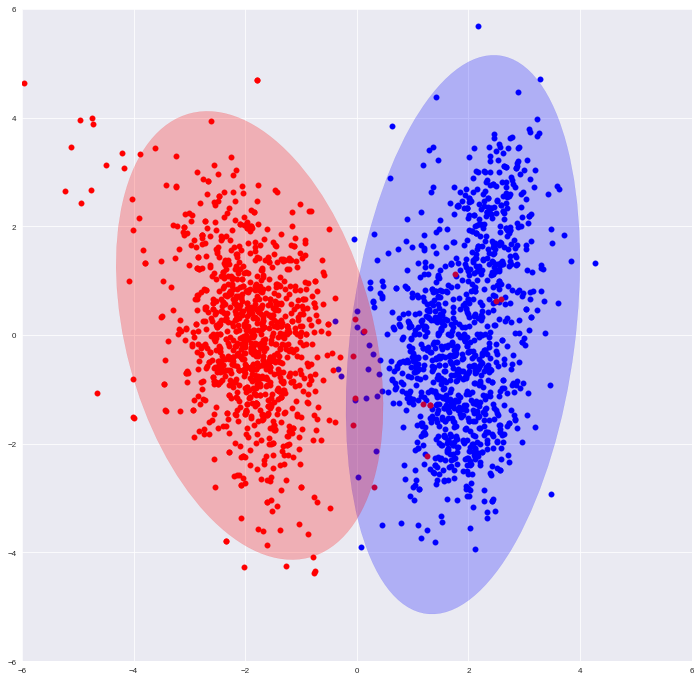

In [11]:
col_1,col_2='pc1','pc2'
alpha=0.05
freedomDegrees=2
plt.figure(figsize=(12,12))
plt.axis([-6,6,-6,6])

scatterPlot(plt,transformedWhiteWinneDF,col_1,col_2,'Blue')
getProbabilityDensityContour(plt,transformedWhiteWinneDF,\
                            [col_1,col_2],alpha,freedomDegrees,\
                             color='Blue',name='Transformed White Winne')

scatterPlot(plt,transformedRedWinneDF,col_1,col_2,'Red')
getProbabilityDensityContour(plt,transformedRedWinneDF,\
                            [col_1,col_2],alpha,freedomDegrees,\
                             color='Red',name='Transformed Red Winne')
plt.show()

Applying the pca to the validation dataset

In [12]:
testinglabeledVectorsDF = testingDF.crossJoin(f.broadcast(statisticsDF))\
                                   .select([c(labelCol)]+stdExpresions)\
                                   .select(stdSchema+[labelCol]).rdd\
                                   .map(lambda x:(Vectors.dense(x[0:p]),x[p]))\
                                   .toDF(['vectors',labelCol])

transformedTestingDF = pcaModel.transform(testinglabeledVectorsDF).select(['features',labelCol])

biplotSchema = ['pc'+str(k+1) for k in range(0,k)]

biplotMarksDF = transformedTestingDF.select(['features']).rdd\
                                    .map(lambda r: [float(r[0].values[i]) for i in range (0,k)])\
                                    .toDF(biplotSchema)

Visualizing the set of validation data without labels, it is clear that there are two groups, however there are samples that are scattered and it is not clear to what type of population it belongs

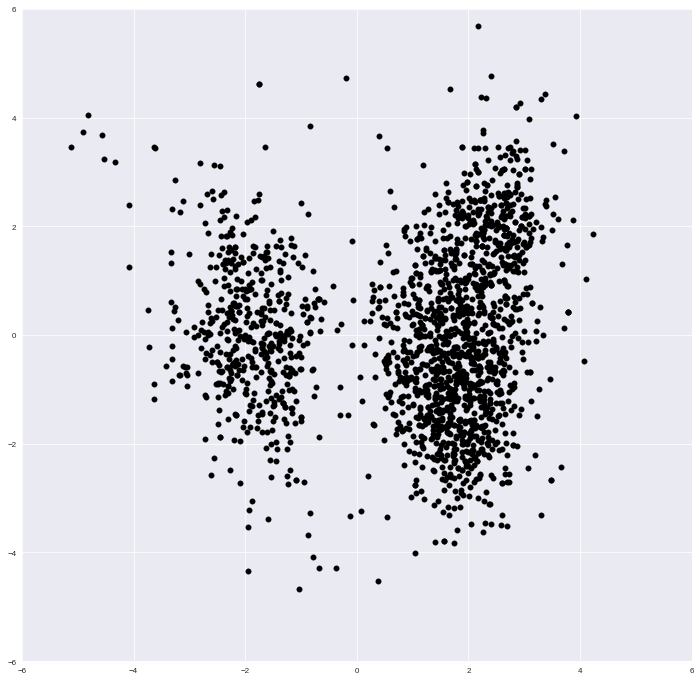

In [14]:
col_1,col_2='pc1','pc2'
alpha=0.05
freedomDegrees=2
plt.figure(figsize=(12,12))
plt.axis([-6,6,-6,6])
scatterPlot(plt,biplotMarksDF,col_1,col_2,'Black')
plt.show() 

**Fiting the logistic regression**
___

In [15]:
from pyspark.ml.classification import LogisticRegression

logisticRegressionModel = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)\
                                   .fit(transformedTrainingDF)

print("Coefficients: " + str(logisticRegressionModel.coefficients))
print("Intercept: " + str(logisticRegressionModel.intercept))

Coefficients: [-0.374498753676,0.0]
Intercept: -0.007717667090335051


Estimating the probabilities for the testing data set

In [16]:
probabilitiesDF = logisticRegressionModel.transform(transformedTestingDF)
probabilitiesDF.limit(5).toPandas()

,features,label,rawPrediction,probability,prediction
0,"[2.24184054453, -2.09475064728]",0,"[0.847284156958, -0.847284156958]","[0.699997122272, 0.300002877728]",0.0
1,"[0.839477119397, -2.38208202334]",0,"[0.322100802044, -0.322100802044]","[0.579836148213, 0.420163851787]",0.0
2,"[1.77053275508, 0.649289041978]",0,"[0.670779977212, -0.670779977212]","[0.661677787143, 0.338322212857]",0.0
3,"[1.43889489531, -1.63725072461]",0,"[0.546582012055, -0.546582012055]","[0.63334222872, 0.36665777128]",0.0
4,"[1.55778065769, -3.79344384375]",0,"[0.591104581898, -0.591104581898]","[0.643618547919, 0.356381452081]",0.0


# Clasification metrics
___

Since that $\hat{p}(\mathbf{x})$ is actually the estimator of the probability of belonging or not belonging to the target population then conditioning the observed value to be 0 or 1, we obtain the random variables that have associated the distributions of the positives $f_{\hat{Y}|Y=1}(y)$ and negatives $f_{\hat{Y}|Y=0}(y)$. For some fixed threshold $t \in \left[0,1 \right]$ consider the following function: 

$$
T(\hat{Y};t) = 
     \begin{cases}
       \text{1} &\quad t \leq \hat{Y}\\
       \text{0} &\quad \hat{Y} < t \\
     \end{cases}
$$



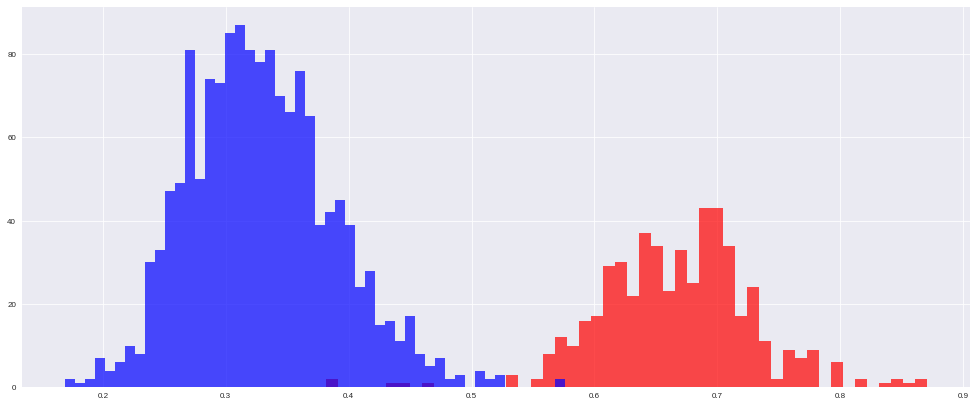

In [17]:
distrPD = probabilitiesDF.select(['label','probability'])\
                         .rdd.map(lambda r: (r[0],float(r[1][1])))\
                         .toDF(['label','probability'])\
                         .toPandas()

distrPD[distrPD['label']==1]['probability'].hist(bins=50,color='Red',alpha=0.7,figsize=(17,7))
distrPD[distrPD['label']==0]['probability'].hist(bins=50,color='Blue',alpha=0.7,figsize=(17,7))

In [18]:
binaryLogisticRegressionSummary = logisticRegressionModel.evaluate(transformedTestingDF)

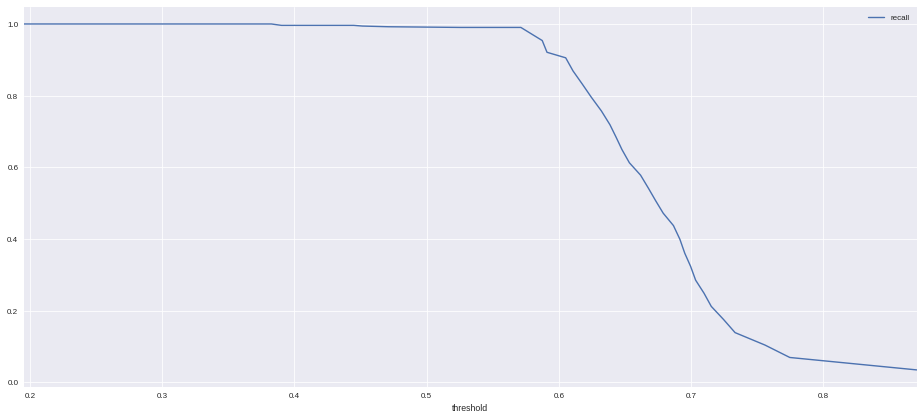

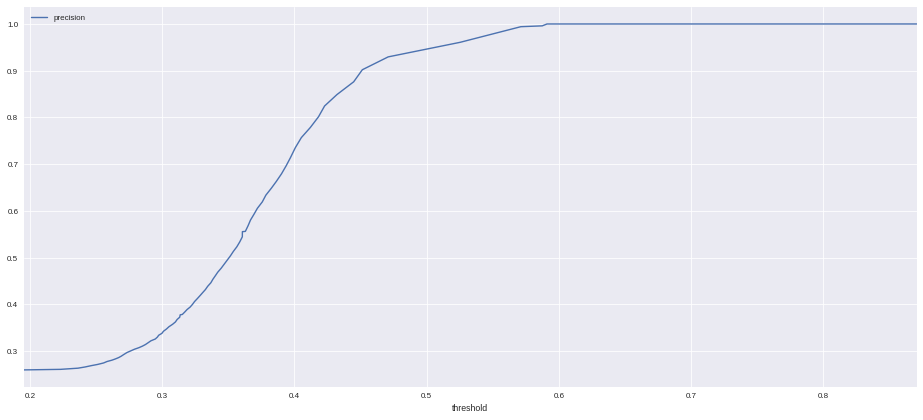

In [19]:
binaryLogisticRegressionSummary.recallByThreshold.orderBy('threshold')\
                               .toPandas()\
                               .plot(x='threshold',y='recall',figsize=(16,7))

binaryLogisticRegressionSummary.precisionByThreshold\
                               .orderBy('threshold').toPandas()\
                               .plot(x='threshold',y='precision',figsize=(16,7))

In [20]:
biplotSchema = ['pc'+str(k+1) for k in range(0,k)]

transformedWhiteWinneDF = probabilitiesDF.where(c('prediction') == lit(0))\
                                         .select(['features']).rdd\
                                         .map(lambda r: [float(r[0].values[i]) for i in range (0,k)])\
                                         .toDF(biplotSchema)

transformedRedWinneDF = probabilitiesDF.where(c('prediction') == lit(1))\
                                       .select(['features']).rdd\
                                       .map(lambda r: [float(r[0].values[i]) for i in range (0,k)])\
                                       .toDF(biplotSchema)

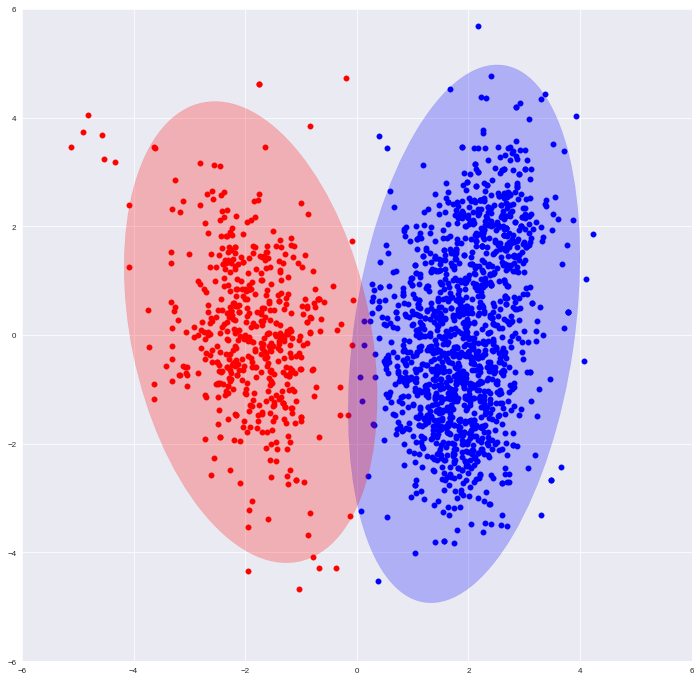

In [21]:
col_1,col_2='pc1','pc2'
alpha=0.05
freedomDegrees=2
plt.figure(figsize=(12,12))
plt.axis([-6,6,-6,6])

scatterPlot(plt,transformedWhiteWinneDF,col_1,col_2,'Blue')
getProbabilityDensityContour(plt,transformedWhiteWinneDF,\
                            [col_1,col_2],alpha,freedomDegrees,\
                             color='Blue',name='Transformed White Winne')

scatterPlot(plt,transformedRedWinneDF,col_1,col_2,'Red')
getProbabilityDensityContour(plt,transformedRedWinneDF,\
                            [col_1,col_2],alpha,freedomDegrees,\
                             color='Red',name='Transformed Red Winne')
plt.show()

In [22]:
binaryLogisticRegressionSummary = logisticRegressionModel.evaluate(transformedTestingDF)
print('Area under roc curve: '+str(binaryLogisticRegressionSummary.areaUnderROC))

Area under roc curve: 0.9990157505977197


# Logistic regression significance metrics

### Wald test for goodness of fit
___
Consider the MLE $\hat{\beta_j}$, by the asymptotic distribution theorem for the MLE, whe have that:

$$
\frac{\hat{\beta_j}-B_0}{\sqrt{V(\hat{\beta_j}})} \sim N(0,1)
\implies \frac{(\hat{\beta_j}-B_0)^2}{V(\hat{\beta_j})} \sim \chi_{(1)}^2
$$

Where $B_0$ is a fixed expected value to contrast, usually $B_0 = 0$ to test significance. Its possible to obtain the variance of the MLE vector $(\hat{\beta}_0,\hat{\beta}_1,...,\hat{\beta}_p)$ computing the Fisher information. $\mathbf{I(\beta)}=-E\left[ \nabla^2 ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p) \right]$, computing the partial derivates of second order:

$$
\begin{align*}
\frac{\partial^2}{\partial \beta_j \partial \beta_k} \mathcal{L}(\beta_0,\beta_1,...,\beta_p) &= -\sum_{i=1}^n x_{ij}x_{ik} \frac{e^{\sum_{l=0}^{p} \beta_l x_{il}}}{\left(1+e^{\sum_{l=0}^{p} \beta_l x_{il}}\right)^2} = -\sum_{i=1}^n x_{ij}x_{ik} p(\mathbf{x_i})(1-p(\mathbf{x_i}))\\
\nabla^2 ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p) &= 
\begin{bmatrix}
    1 & 1 & \dots & 1 \\
    x_{11} & x_{21} & \dots & x_{1n} \\
    \vdots & \vdots & \ddots  & \vdots\\
    x_{1p} & x_{2p} & \dots & x_{pn}
\end{bmatrix}
\begin{bmatrix}
    p(\mathbf{x_1})(1-p(\mathbf{x_1})) & 0 & \dots  & 0 \\
    0 & p(\mathbf{x_2})(1-p(\mathbf{x_2})) & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots  \\
    0 & 0  & \dots  & p(\mathbf{x_n})(1-p(\mathbf{x_n})) \\
\end{bmatrix}
\begin{bmatrix}
    1 & x_{11} & \dots & x_{1p} \\
    1 & x_{21} & \dots & x_{2p} \\
    \vdots & \vdots & \ddots & \vdots\\
    1 & x_{n1} & \dots & x_{np}
\end{bmatrix}\\
\nabla^2 ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p) &= \mathbf{X'}diag\left(p(\mathbf{x_1})(1-p(\mathbf{x_1})),\dots,p(\mathbf{x_n})(1-p(\mathbf{x_n}))\right)\mathbf{X'}\\
\mathbf{Cov(\beta)} & = \left[\mathbf{X'}diag\left(p(\mathbf{x_1})(1-p(\mathbf{x_1})),\dots,p(\mathbf{x_n})(1-p(\mathbf{x_n}))\right)\mathbf{X'}\right]^{-1} \\
\implies V(\hat{\beta_j}) &= \left[\mathbf{X'}diag\left(p(\mathbf{x_1})(1-p(\mathbf{x_1})),\dots,p(\mathbf{x_n})(1-p(\mathbf{x_n}))\right)\mathbf{X'}\right]^{-1}_{jj}\\ 
\end{align*}
$$

Considere the follwing hypotesis testing for the vector of MLE betas $\mathbf{\hat{\beta}}=(\hat{\beta_0},...,\hat{\beta_p})$, with alternative hypotesis $H_a: \mathbf{\hat{\beta}=0}$ versus $H_a: \mathbf{\hat{\beta} \neq 0}$ to contrast the significance of the coeficients. The statistic:

$$\chi^2 = \sum_{j=0}^{p} \frac{\beta_j^2}{V(\hat{\beta_j})} \sim \chi_{(p)}^2$$

For some confidence $(1-\alpha)100$% and the chisquared critical value asociated $\chi_{(1-\alpha)}^2$ dont reject when $\chi^2 \leq \chi_{(1-\alpha)}^2$


### Bias Variance Trade-Off
____

Lets supose that the model follows $Y=p(\mathbf{x})+\epsilon$ where $E[\epsilon]=0$ and $V[\epsilon]=\sigma^2$. Then the commited error by the fit its given by.

$$
\begin{align*}
\left(Y-\hat{p}(\mathbf{x})\right)^2 &= \left(Y-\hat{p}(\mathbf{x})\right)^2 \\
E\left[\left(Y-\hat{p}(\mathbf{x})\right)^2\right] &= E\left[\left(p(\mathbf{x})+\epsilon-\hat{p}(\mathbf{x})\right)^2 \right] \\
&= E\left[\left(\epsilon+p(\mathbf{x})-\hat{p}(\mathbf{x})\right)^2 \right]\\
&= E\left[\epsilon^2+2\epsilon\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right) +\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right)^2 \right]\\
&= E\left[\epsilon^2\right]+2E\left[\epsilon\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right)\right]+ E\left[\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right)^2 \right]\\
&= E\left[\epsilon^2\right]+E\left[\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right)^2 \right]\\
E\left[\left(Y-\hat{p}(\mathbf{x})\right)^2\right] &=\underbrace{E\left[\epsilon^2\right]}_{Irreducible Error}+\underbrace{E\left[\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right)\right]^2}_{Bias}+\underbrace{V\left[\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right)\right]}_{Reducible Error}\\
\end{align*}
$$